In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_mat = pd.read_pickle('df_mat-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_mat.shape

(395, 43)

In [4]:
X = np.array(df_mat.drop('G3',axis = 1))
y = np.array(df_mat['G3'])

## Feature Importance

### Linear Regression

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [6]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train = sc.transform(X_train)

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

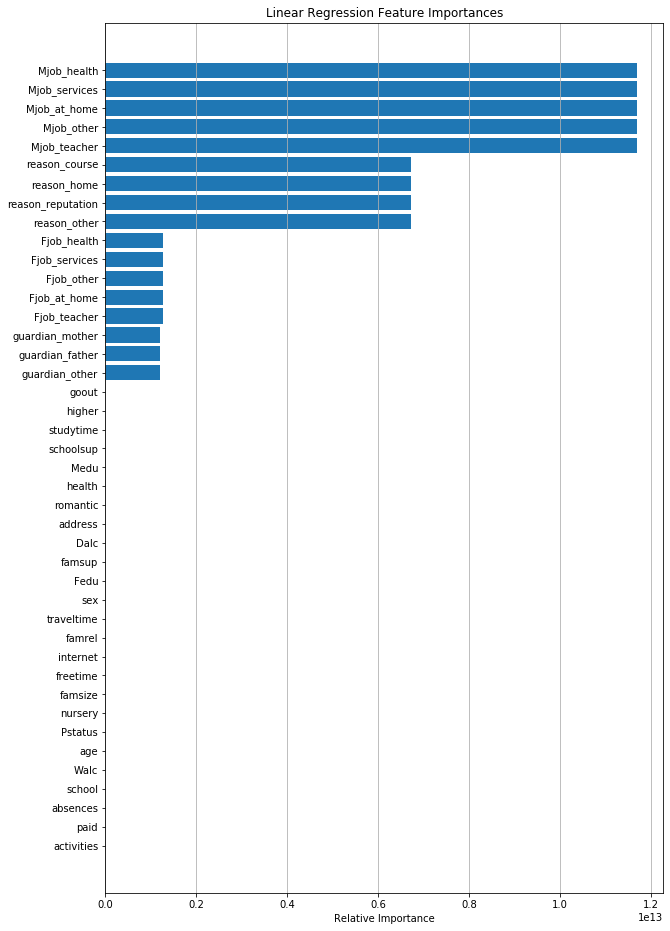

In [9]:
feature_importances = np.abs(model.coef_)
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_mat.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('Linear Regression Feature Importances')
plt.xlabel('Relative Importance');

In [10]:
feature_importance_lir = pd.DataFrame(np.argsort(np.argsort(model.coef_)))
feature_importance_lir.columns = ['fi_lir']
feature_importance_lir.set_index(df_mat.drop('G3',axis = 1).columns,inplace = True)

feature_importance_lir

,fi_lir
school,20
sex,14
age,18
address,30
famsize,16
Pstatus,17
Medu,31
Fedu,28
traveltime,15
studytime,32


### Random Forest Classifier

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [12]:
sm = SMOTE(k_neighbors = 3,random_state = 42)

In [13]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [14]:
X_train.shape

(670, 42)

In [15]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = sc.transform(X_train)

In [17]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 15,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

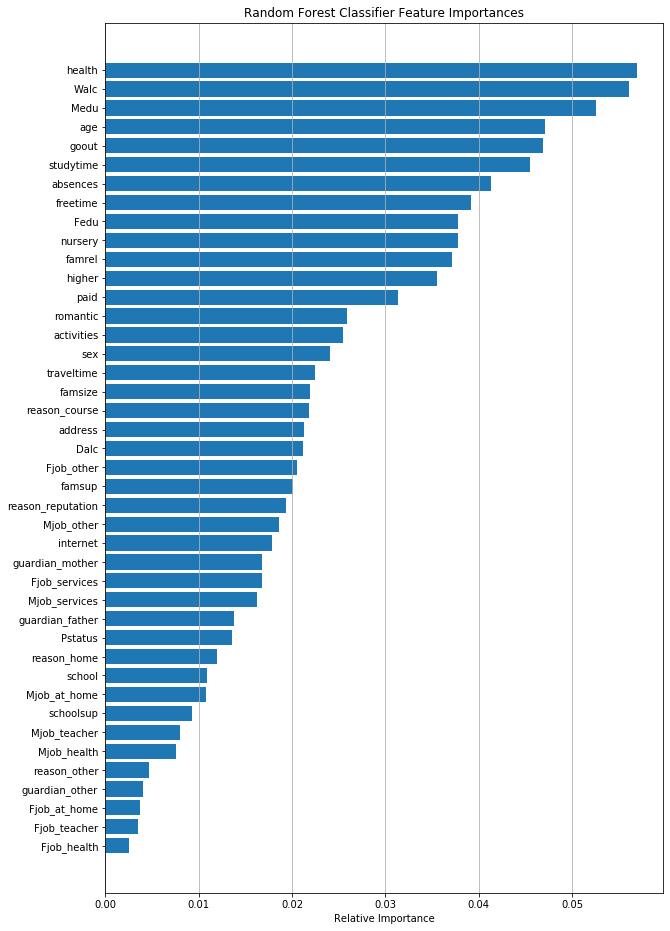

In [18]:
feature_importances = model.feature_importances_
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_mat.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('Random Forest Classifier Feature Importances')
plt.xlabel('Relative Importance');

In [19]:
feature_importance_rf = pd.DataFrame(np.argsort(np.argsort(model.feature_importances_)))
feature_importance_rf.columns = ['fi_rf']
feature_importance_rf.set_index(df_mat.drop('G3',axis = 1).columns,inplace = True)

feature_importance_rf

,fi_rf
school,9
sex,26
age,38
address,22
famsize,24
Pstatus,11
Medu,39
Fedu,33
traveltime,25
studytime,36


## Feature Importances Table

In [20]:
df_feature_importances_table = pd.concat([feature_importance_lir,feature_importance_rf],axis = 1)

df_feature_importances_table.head()

,fi_lir,fi_rf
school,20,9
sex,14,26
age,18,38
address,30,22
famsize,16,24


In [21]:
df_feature_importances_table['score'] = df_feature_importances_table['fi_lir'] + df_feature_importances_table['fi_rf']

df_feature_importances_table.head()

,fi_lir,fi_rf,score
school,20,9,29
sex,14,26,40
age,18,38,56
address,30,22,52
famsize,16,24,40


In [22]:
df_feature_importances_table['score'].sort_values(ascending = False)

Medu                 70
studytime            68
higher               63
Fedu                 61
freetime             59
Walc                 59
famrel               58
nursery              56
age                  56
absences             56
Mjob_other           55
Mjob_services        53
address              52
health               52
paid                 51
guardian_mother      51
Dalc                 50
activities           50
guardian_father      47
Mjob_at_home         47
goout                46
Mjob_health          46
Mjob_teacher         43
internet             42
traveltime           40
sex                  40
romantic             40
famsize              40
guardian_other       37
famsup               32
school               29
Pstatus              28
Fjob_other           26
reason_course        23
reason_reputation    20
Fjob_services        19
schoolsup            17
reason_home          11
Fjob_at_home          9
Fjob_teacher          9
reason_other          7
Fjob_health     

In [23]:
df_feature_importances_table = df_feature_importances_table.sort_values('score',ascending = False)

df_feature_importances_table.head()

,fi_lir,fi_rf,score
Medu,31,39,70
studytime,32,36,68
higher,33,30,63
Fedu,28,33,61
Walc,19,40,59


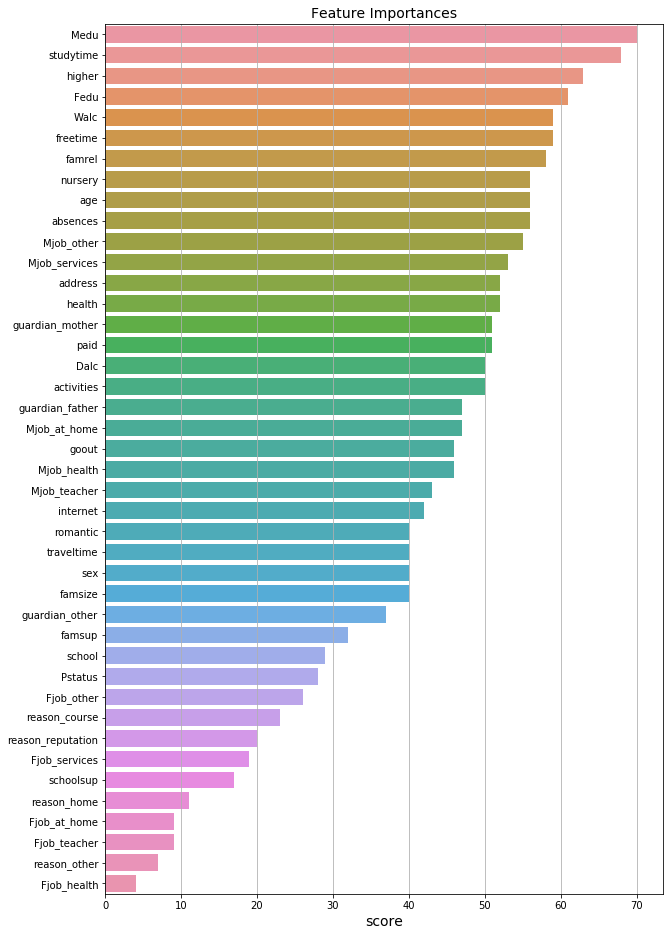

In [24]:
plt.figure(figsize = (10,16))
sns.barplot(data = df_feature_importances_table,x = 'score',y = df_feature_importances_table.index)
plt.gca().xaxis.grid(True)
plt.title('Feature Importances',fontsize = 14)
plt.xlabel('score',fontsize = 14);